# Prioritized Sweeping on Mazes

Prioritized sweeping has been found to dramatically increase the speed at which optimal solutions are found in maze tasks, often by a factor of 5 to 10. A typical example is shown below.
- These data are for a sequence of maze tasks of exactly the same structure as the one shown in Figure 8.2, except that they vary in the grid resolution.
- Prioritized sweeping maintained a decisive advantage over unprioritized Dyna-Q.
- Both systems made at most $n=5$ updates per environmental interaction.

In [1]:
from IPython.display import Image

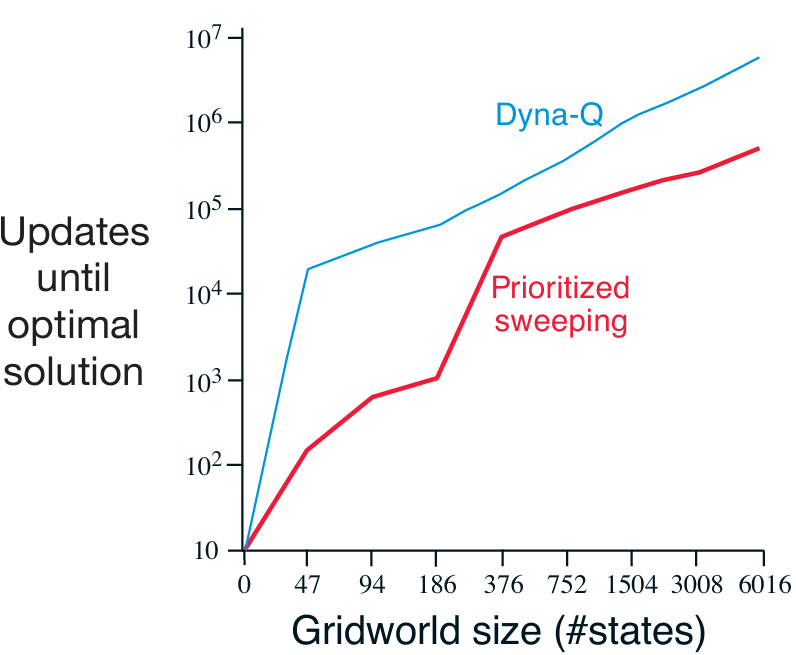

In [2]:
Image(filename="../book_images/Example_8_4.PNG")

In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [4]:
from src.maze import Maze
from src.dyna import DynaParams
from src.models import PriorityModel, TrivialModel
from src.functions import prioritized_sweeping, dyna_q, check_path

In [5]:
# Get the original 6x9 maze
original_maze = Maze()

In [6]:
# Set up the parameters for Dyna algorithm
params_dyna = DynaParams()
params_dyna.planning_steps = 5
params_dyna.step_size = 0.5
params_dyna.discount = 0.95

In [7]:
# Set up the parameters for Prioritized Sweeping
params_prioritized = DynaParams()
params_prioritized.threshold = 0.0001
params_prioritized.planning_steps = 5
params_prioritized.step_size = 0.5
params_prioritized.discount = 0.95

In [8]:
# Create a list of all parameters
params = [params_prioritized, params_dyna]

In [9]:
# Set up models for planning
models = [PriorityModel, TrivialModel]

# Set up method names
method_names = ["Prioritized Sweeping", "Dyna-Q"]

In [10]:
# Set up the number of mazes. Assuming the 1st maze has w * h states, then k-th maze has w * h * k * k states
number_of_mazes = 5

In [11]:
# Build all the mazes
mazes = [original_maze.extend_maze(i) for i in range(1, number_of_mazes + 1)]

# Set up methods
methods = [prioritized_sweeping, dyna_q]

In [12]:
# Number of runs
runs = 5

# Track the number of backups
backups = np.zeros((runs, 2, number_of_mazes))

In [13]:
# For every run
for run in range(runs):
    # for every method
    for i in range(len(method_names)):
        # for every maze
        for maze_index, maze in zip(range(len(mazes)), mazes):
            print(f"Run = {run}, Method = {method_names[i]}, Maze size = {maze.world['height'] * maze.world['width']}")

            # initialize the state-action value estimates with 0s
            action_value_estimates = np.zeros(maze.action_value_estimates_size)

            # track steps / backups for each episode
            steps = []

            # generate the model
            model = models[i]()

            # play for an episode
            while True:
                steps.append(methods[i](action_value_estimates, model, maze, params[i]))

                # print best actions w.r.t. current state-action values
                # printActions(currentStateActionValues, maze)

                # check whether the (relaxed) optimal path is found
                if check_path(action_value_estimates, maze):
                    break

            # update the total steps / backups for this maze
            backups[run, i, maze_index] = np.sum(steps)

Run = 0, Method = Prioritized Sweeping, Maze size = 54
Run = 0, Method = Prioritized Sweeping, Maze size = 216
Run = 0, Method = Prioritized Sweeping, Maze size = 486
Run = 0, Method = Prioritized Sweeping, Maze size = 864
Run = 0, Method = Prioritized Sweeping, Maze size = 1350
Run = 0, Method = Dyna-Q, Maze size = 54
Run = 0, Method = Dyna-Q, Maze size = 216
Run = 0, Method = Dyna-Q, Maze size = 486
Run = 0, Method = Dyna-Q, Maze size = 864
Run = 0, Method = Dyna-Q, Maze size = 1350
Run = 1, Method = Prioritized Sweeping, Maze size = 54
Run = 1, Method = Prioritized Sweeping, Maze size = 216
Run = 1, Method = Prioritized Sweeping, Maze size = 486
Run = 1, Method = Prioritized Sweeping, Maze size = 864
Run = 1, Method = Prioritized Sweeping, Maze size = 1350
Run = 1, Method = Dyna-Q, Maze size = 54
Run = 1, Method = Dyna-Q, Maze size = 216
Run = 1, Method = Dyna-Q, Maze size = 486
Run = 1, Method = Dyna-Q, Maze size = 864
Run = 1, Method = Dyna-Q, Maze size = 1350
Run = 2, Method = Pr

In [14]:
# Average number of backups
backups = backups.mean(axis=0)

# Dyna-Q performs several backups per step
backups[1, :] *= params_dyna.planning_steps + 1

In [15]:
# Plotting
for i in range(0, len(method_names)):
    plt.plot(np.arange(1, number_of_mazes + 1), backups[i, :], label=method_names[i])

plt.xlabel("Maze resolution factor")
plt.ylabel("Backups until optimal solution")
plt.yscale("log")
plt.legend()

plt.savefig("../generated_imag9es/example_8_4.png")
plt.close()